In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier

# Charger le jeu de données
df = pd.read_csv('dataset_test4.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)


cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['UrbanRural'] + ['FranchiseBinary']
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary')),
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, n_jobs=-1, max_depth=15, min_child_weight=16))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, shuffle=True, test_size=0.05, random_state=42, stratify=y_encoded)

# Ajuster la pipeline sur les données d'entraînement
xgboost_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = xgboost_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = xgboost_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(accuracy)
print(report)


Nombre de caractéristiques après le prétraitement : 121
0.9459490875276066
              precision    recall  f1-score   support

      CHGOFF       0.87      0.86      0.87      6977
       P I F       0.96      0.97      0.97     27435

    accuracy                           0.95     34412
   macro avg       0.92      0.91      0.92     34412
weighted avg       0.95      0.95      0.95     34412



In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Charger le jeu de données

df = pd.read_csv('dataset_test1.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)


cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary'] 
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('NewExist')  
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


rf_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(accuracy, report)


Nombre de caractéristiques après le prétraitement : 126
0.9350866359112209               precision    recall  f1-score   support

      CHGOFF       0.89      0.77      0.83     27906
       P I F       0.94      0.98      0.96    109739

    accuracy                           0.94    137645
   macro avg       0.92      0.87      0.89    137645
weighted avg       0.93      0.94      0.93    137645



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier

# Charger le jeu de données
df = pd.read_csv('dataset_test1.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# encoder la variable cible
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)


# cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary']
# num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary'] 
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('NewExist')  
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 
# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary')),
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators = 100, random_state=42, n_jobs=-1,max_depth=15, min_child_weight=16))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.05, random_state=42, stratify=y)

# Ajuster la pipeline sur les données d'entraînement
xgboost_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = xgboost_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = xgboost_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)


Nombre de caractéristiques après le prétraitement : 126
0.9496106009531559
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     27435
           1       0.88      0.87      0.87      6977

    accuracy                           0.95     34412
   macro avg       0.92      0.92      0.92     34412
weighted avg       0.95      0.95      0.95     34412



In [25]:
# Obtenir les importances des caractéristiques du modèle XGBoost
feature_importances = xgboost_pipeline.named_steps['classifier'].feature_importances_

# Obtenir les noms des caractéristiques transformées
feature_names = xgboost_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Créer un DataFrame pour visualiser les importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Afficher les importances des caractéristiques
print(importance_df)

               Feature  Importance
2            num__Term    0.115915
122  cat__UrbanRural_0    0.044928
65   cat__BankState_CA    0.033192
108  cat__BankState_VA    0.032362
88   cat__BankState_MT    0.027576
..                 ...         ...
62   cat__BankState_AN    0.000000
60   cat__BankState_AK    0.000000
109  cat__BankState_VI    0.000000
72   cat__BankState_GU    0.000000
101  cat__BankState_PR    0.000000

[126 rows x 2 columns]


In [26]:
from sklearn.model_selection import cross_val_predict

y_train_pred_xgb = cross_val_predict(xgboost_pipeline, X_train, y_train)

/home/utilisateur/Bureau/brief_classif_sba/ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/utilisateur/Bureau/brief_classif_sba/ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[506203,  15053],
       [ 17928, 114625]])

,Predicted PIF (0),Predicted CHGOFF (1)
Actual PIF (0),506203,15053
Actual CHGOFF (1),17928,114625


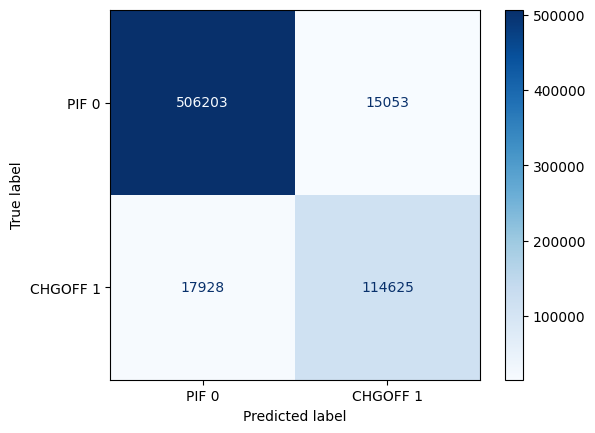

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# On crée la matrice de confusion en passant les classes et les prédictions du modèle, puis on l'affiche
cm = confusion_matrix(y_train, y_train_pred_xgb)
display(cm)

# Affichage avec un DataFrame
conf_matrix = pd.DataFrame(cm, index=["Actual PIF (0)", "Actual CHGOFF (1)"], columns=["Predicted PIF (0)", "Predicted CHGOFF (1)"])
display(conf_matrix)

# Affichage avec un plot
graph_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["PIF 0", "CHGOFF 1"])
graph_cm.plot(cmap="Blues")

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    521256
           1       0.88      0.86      0.87    132553

    accuracy                           0.95    653809
   macro avg       0.92      0.92      0.92    653809
weighted avg       0.95      0.95      0.95    653809



In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
# Au lieu d'obtenir les prédictions, on récupere les scores de probabilités pour chaque observations
y_probas_xgb = cross_val_predict(xgboost_pipeline, X_train, y_train, method="predict_proba")
display(y_probas_xgb)

# On récupere uniquement les probabilités pour la classe positive
y_scores_xgb = y_probas_xgb[:, 1]

# A partir des probabilités on calcule les combinaisons de scores pour recall et precision en fonction du seuil
precisions_tr, recalls_tr, thresholds_tr = precision_recall_curve(y_train, y_scores_xgb)

/home/utilisateur/Bureau/brief_classif_sba/ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/utilisateur/Bureau/brief_classif_sba/ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.70977926, 0.2902207 ],
       [0.01020157, 0.9897984 ],
       [0.99247783, 0.00752216],
       ...,
       [0.9936825 , 0.00631749],
       [0.996391  , 0.00360901],
       [0.9940979 , 0.00590214]], dtype=float32)

In [42]:
from sklearn.metrics import roc_curve

# La fonction roc_curve retourne le FPR, TPR et les seuils 
fpr_xgb, tpr_xgb, tresholds_xgb = roc_curve(y_train, y_scores_xgb)

In [43]:
import matplotlib.pyplot as plt
# Fonction pour représenter la courbe ROC
def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("Courbe ROC")
    plt.xlabel("Taux de Faux Positif")
    plt.ylabel("Taux de Vrai Positif")
    plt.grid()

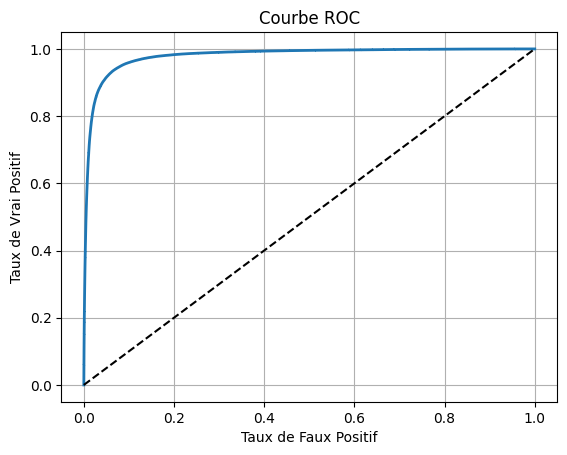

In [46]:
plot_roc_curve(fpr_xgb, tpr_xgb)
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score

display(roc_auc_score(y_train, y_scores_xgb))

0.9795523055432922